# Lab 2 : Linear Classification, Logistic Regression, SVM, Decision Tree, Boosting

---


Total Points: **100**

Tentative Weightage : **9%**

Submission Deadline :  **$23^{th}$ March 2024 , 10:00 AM** (3 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**




---



# Import and Data set Values

In [ ]:
!pip install cvxopt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from cvxopt import matrix, solvers

In [ ]:
dataset1_url = "https://drive.google.com/file/d/1r5BhJBYifNfGglDo68HesI0xrGIXHnqv/view?usp=sharing"
file_id = dataset1_url.split('/')[-2]
dataset_1 = dataset_1 = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}')
dataset_1.head()

,Unnamed: 0,speed,price,hp,mileage,Model
0,0,51.0,35.0,14.0,2.0,Series M
1,1,49.0,30.0,14.0,2.0,Series M
2,2,47.0,32.0,13.0,2.0,Series M
3,3,46.0,31.0,15.0,2.0,Series M
4,4,50.0,36.0,14.0,2.0,Series M


In [ ]:
dataset2_url = "https://drive.google.com/file/d/1ZPWRDUkykzv4esQgVXv9i9sx0LQS6Lvh/view?usp=sharing"
file_id = dataset2_url.split('/')[-2]
dataset_2 = pd.read_csv(f'https://drive.google.com/uc?export=download&id={file_id}', sep = ';')
dataset_2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# TASK 1

**TASK 1**: Classification                                     **(40 Marks)**

We'll begin by considering dataset_1.csv for this particular task. This dataset is referenced in literature for classification methods and is widely employed in the fields of statistics and machine learning. It comprises three classes, each containing 50 instances. These classes represent different models of cars. Notably, one class exhibits linear separability from the other two, whereas the remaining two classes are not linearly separable from each other. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the three classes. (4 Marks)
    1. speed vs price
    2. speed vs hp

2. Implement the Linear Classifier and visualize the classified samples based on the speed and price features. Mark the misclassified samples with different color. Provide a detailed elucidation of your findings and observations in the report. (4+3+4 Marks)

<!-- 3. Implement correlation matrix for the given dataset. Your implementation should handle numerical data and provide correlation coefficients between all pairs of variables. Report your observation. Additionally, discuss the significance of correlation matrices in statistical analysis and data interpretation. (3+2 Marks)   -->

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets.
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

    1. Implement a Elastic Net logistic regressor (with $\alpha=0$, described below) using the gradient descent method. Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (7 Marks)

    2. Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

    3. Plot the classifier for the best regressor. Does the performance improve in comparison to least square method? (3+1 Marks)

    4. If you can implement both L1 and L2 regularization in part 1 i.e., algorithm which considers user defined $\alpha$ and not fixed to 0, then you will be awarded 10 Marks over and above the assignment total marks. Report your observation for different $\alpha$ values. (Optional Question)

5. Implement a Vanilla logistic regressor. Did you observed any difference? If so report your observation with the the Elastic Net classifier. (4+4 Marks)

**Elastic Net Logistic Regression** is a variant of logistic regression that combines both L1 (Lasso) and L2 (Ridge) regularization terms in the cost function. The elastic net regularization technique aims to address some limitations of individual L1 and L2 regularization methods. Mathematically, it is defined as a convex combination of the L1 and the L2 regularization terms:
<br>
$\alpha(\lambda∥w∥_1)+(1−\alpha)(\frac{\lambda}{2}∥w∥_2^2),\alpha \in [0,1],\lambda \ge 0$
<br>
By setting α properly, elastic net contains both L1 and L2 regularization as special cases. For example, if a linear regression model is trained with the elastic net parameter $\alpha$ set to 1, it is equivalent to a Lasso model. On the other hand, if $\alpha$ is set to 0, the trained model reduces to a ridge regression model.

**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Sample of decision boundary.

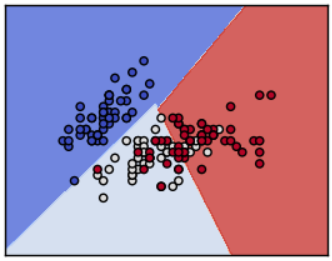

Write your code by creating cells below.


## 1. Ploting

In [ ]:
dataset_1['Model'].value_counts()

Series M    50
Series L    50
Series N    50
Name: Model, dtype: int64

### Ploting Speed Vs Price

In [ ]:
_color = {'Series M': 'blue', 'Series L': 'red', 'Series N': 'green'}

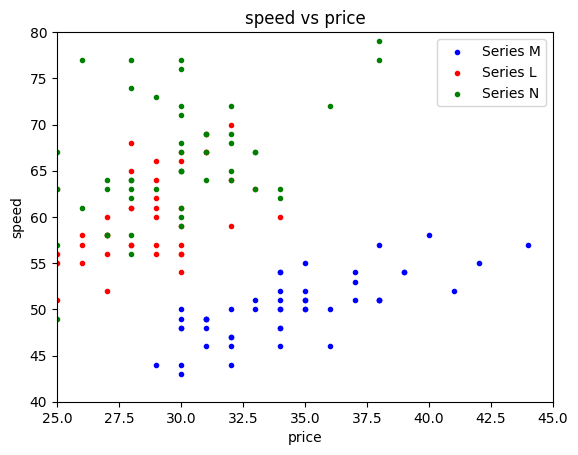

In [ ]:
for s_no, speed, price, hp, milage, model in dataset_1.values:
    plt.plot(price, speed, color = _color[model], marker = '.')

plt.scatter(0, 0, color = 'blue', marker = '.', label = 'Series M')
plt.scatter(0, 0, color = 'red', marker = '.', label = 'Series L')
plt.scatter(0, 0, color = 'green', marker = '.', label = 'Series N')

plt.xlim((25, 45))
plt.ylim((40, 80))
plt.legend()

plt.title('speed vs price')
plt.xlabel('price')
plt.ylabel('speed')
plt.show()

### Ploting Speed Vs Horsepower

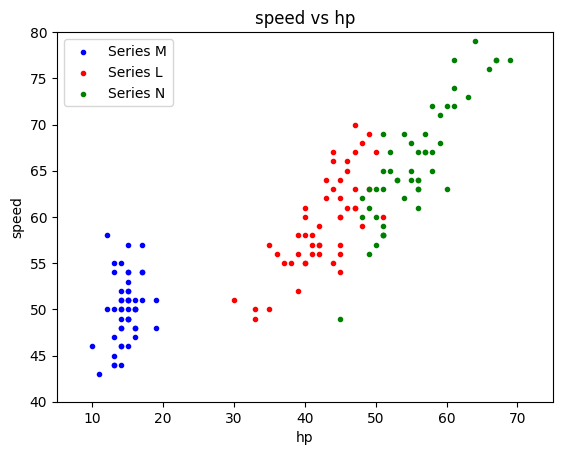

In [ ]:
for s_no, speed, price, hp, milage, model in dataset_1.values:
    plt.plot(hp, speed, color = _color[model], marker = '.')

plt.scatter(0, 0, color = 'blue', marker = '.', label = 'Series M')
plt.scatter(0, 0, color = 'red', marker = '.', label = 'Series L')
plt.scatter(0, 0, color = 'green', marker = '.', label = 'Series N')

plt.xlim((5, 75))
plt.ylim((40, 80))
plt.legend()
plt.title('speed vs hp')
plt.xlabel('hp')
plt.ylabel('speed')

plt.show()

## 2.Linear Classifier

In [ ]:
def descionboundry_classification(grid, model, x_index, y_index):
    # only for classification probelems'
    X = []
    Y = []
    Z = []
    for row in grid:
        #print(row.shape)
        y_pred = model.predict(row)
        Z.append(np.argmax(y_pred, axis = 1))
        X.append(row[:, x_index])
        Y.append(row[:, y_index])
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    #print(X.shape, Y.shape, Z.shape)
    # print(np.unique(Z))
    plt.contour(X, Y, Z, colors = 'k')



In [ ]:
class Linear_vanila:
    def __init__(self):
        self.W = None

    def train(self, X_train, Y_train):
        self.W = inv(X_train.T @ X_train) @ X_train.T @ Y_train

    def predict(self, X_test):
        return X_test @ self.W


In [ ]:
def Q1(features = ['Unnamed: 0','speed', 'price']):
    X_train = dataset_1[features] # adding Unnamed: 0 and will make it all 1
    X_train = X_train.values
    # adding a collumn of one in X
    X_train[:, 0] = 1
    Y_train  = dataset_1['Model']
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L', 'Series N']].values
    Y_train = Y_train.astype(float)
    model = Linear_vanila()
    model.train(X_train, Y_train)
    y_pred = model.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', label = 'Series M', marker = '*')
    plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', label = 'Series L', marker = '*')
    plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', label = 'Series N', marker = '*')
    acc = np.sum(Y_train == y_pred) / len(Y_train)
    # print(f'accuracy: {acc}%')
    plt.title(f'speed vs price (accuracy: {acc*100:.2f}%) \n on featrues: {features[1:]}')
    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    if features != ['Unnamed: 0','speed', 'price']:
        plt.show()
        return
    g = []
    for i in np.arange(40, 80, 0.1):
        a = np.ones((300, 3))
        a[:, 2] = np.arange(15, 45, 0.1)
        a[:, 1] = i
        g.append(a)
    g = np.array(g)

    descionboundry_classification(g, model, 2, 1)
    plt.show()


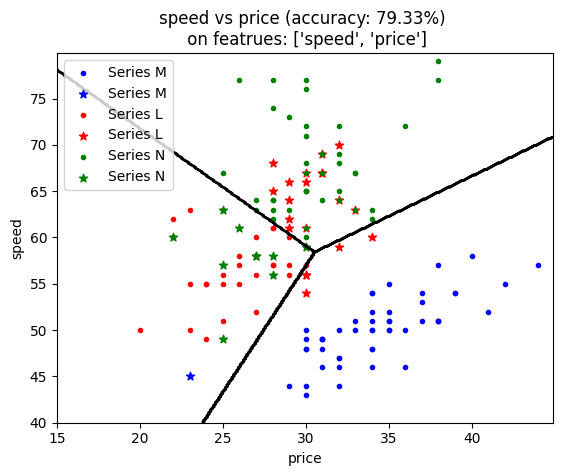

In [ ]:
Q1()

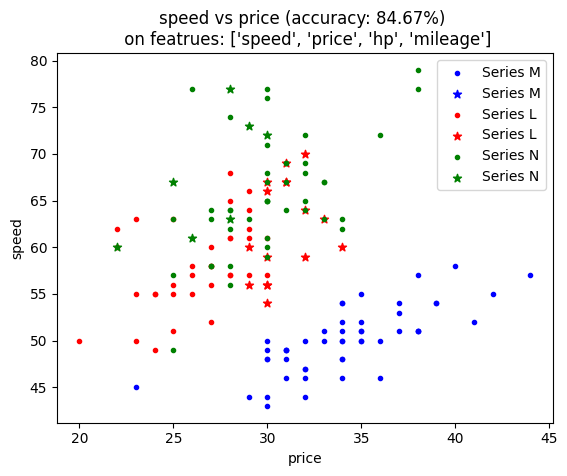

In [ ]:
Q1(features = ['Unnamed: 0','speed', 'price', 'hp', 'mileage'])

## Helper

In [ ]:
def train_test_split(data, frac = 0.8):
    """
        Input: data: np.array both X and Y, frac: float
        Output: train_data, test_data
    """
    data_shuffled = np.random.permutation(data)
    split = int(len(data) * frac)
    return data_shuffled[:split], data_shuffled[split:]

In [ ]:
def Gd_step(w, gradiant, lr = 0.001):
    """
        Input: w: np.array, gradiant: np.array, lr: float
        Output: np.array new w
    """
    return w - lr * gradiant

In [ ]:
def softmax(X):
    """
        Input: X: np.array complete prediction matrix
        Output: np.array softmax of X
    """
    def softmax_one(x):
        """Gives the softmax of one example"""
        e_x = np.exp(x - np.max(x)) # subtracting the max to avoid overflow, gives the same result
        return e_x / np.sum(e_x)

    return np.apply_along_axis(softmax_one, 1, X) # applying softmax_one to each row

# softmax(np.array([[1, 2, 3], [1, 1, 1]]))

In [ ]:
def cross_entropy_loss(Y_true, Y_pred):
    """
        Input: Y_true: np.array, Y_pred: np.array
        Output: float cross entropy loss
        This is same as maximizing the log likelihood
    """
    np.seterr(all='ignore') # ignore divide by zero and multiplication with inf
    ma = Y_true * np.log(Y_pred)
    ma = np.nan_to_num(ma, neginf = -1e100) # making nan to be zero
    np.seterr(all='warn') # back to normal
    return -np.sum(ma) / len(Y_true) # this is a double sum, the minus is to make it a minimization problem

In [ ]:
def cross_entropy_loss_grad(X, Y_true, Y_pred):
    """
        Input: X: np.array, Y_true: np.array, Y_pred: np.array
        Output: np.array gradient of the cross entropy loss complete gradient matrix
    """
    return - X.T @ (Y_true - Y_pred) / len(Y_true)

In [ ]:
def accuracy(Y_true, Y_pred):
    """
        Only for Classification
        Input: Y_true: np.array, Y_pred: np.array
        Output: float accuracy
    """

    return np.sum(np.argmax(Y_true, axis = 1) == np.argmax(Y_pred, axis = 1)) / len(Y_true)

## 3. Elastic Regression

### 3.1

In [ ]:
class Elastic_net_logistic_regression:
    def __init__(self, input_dim, output_dim, lamb = 0.5, alpha = 0):
        """
            Input: input_dim: int, output_dim: int, lamb: float, alpha: float
            Output: None
        """
        self.W = np.random.random((input_dim, output_dim)) + 0.00001 # adding a small number to avoid log(0)
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.lamb = lamb
        self.alpha = alpha
        self.losses = []

    def predict(self, X):
        """
            Input: X: np.array
            Output: np.array Y_pred
        """
        return softmax(X @ self.W)

    def loss(self, Y, Y_pred):
        """
            Input: Y: np.array, Y_pred: np.array
            Output: float loss
        """
        alpha = self.alpha
        lamb = self.lamb
        return cross_entropy_loss(Y, Y_pred) + alpha * lamb * np.sum(np.abs(self.W)) + (1 - alpha) * (lamb/2) * np.sum(self.W ** 2)

    def loss_grad(self, X, Y, Y_pred):
        """
            Input: X: np.array, Y: np.array, Y_pred: np.array
            Output: np.array gradient of the loss
        """
        alpha = self.alpha
        lamb = self.lamb
        return cross_entropy_loss_grad(X, Y, Y_pred) + alpha * lamb * np.sign(self.W) + (1 - alpha) * lamb * self.W

    def train(self, X_train, Y_train, lr = 0.001, epochs = 100, log = False):
        """
            Input: X_train: np.array, Y_train: np.array, lr: float, epochs: int
            Output: None
        """
        for epoch in range(epochs):
            Y_pred = self.predict(X_train)
            gradiant = self.loss_grad(X_train, Y_train, Y_pred)
            self.W = Gd_step(self.W, gradiant, lr)
            los = self.loss(Y_train, Y_pred)
            self.losses.append(los)
            if log:
                print(f'epoch: {epoch}, loss: {los}, accuracy: {accuracy(Y_train, Y_pred)}')

    def grad_graph(self):
        plt.plot(self.losses)
        plt.title(f'loss V/s epoch (alpha: {self.alpha}, lambda: {self.lamb})')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()

    def model_params(self):
        return self.W

In [ ]:
def expermiment_3(alpha, lamb, lr, epochs, plot = False, grad_graph = False):
    """
        Input: alpha: float, lamb: float, lr: float, epochs: int
        Output: None
    """
    data_train, data_test = train_test_split(dataset_1.values)
    X_train = data_train[:, 0:5].astype(float)
    X_train[:, 0] = 1
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L', 'Series N']].values
    X_test = data_test[:, 0:5].astype(float)
    X_test[:, 0] = 1
    Y_test = data_test[:, 5]
    Y_test = pd.get_dummies(Y_test)[['Series M', 'Series L', 'Series N']].values

    model = Elastic_net_logistic_regression(X_train.shape[1], Y_train.shape[1], lamb, alpha)
    model.train(X_train, Y_train, lr, epochs)
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    a1, a2 = accuracy(Y_train, Y_pred_train), accuracy(Y_test, Y_pred_test)

    # print(f'accuracy on Train data: {accuracy(Y_train, Y_pred_train)}')
    # print(f'accuracy on Test data: {accuracy(Y_test, Y_pred_test)}')

    if grad_graph:
        model.grad_graph()

    if plot:
        X_train = np.concatenate((X_train, X_test), axis = 0)
        Y_train = np.argmax(np.concatenate((Y_train, Y_test), axis = 0), axis = 1)
        y_pred = np.argmax(np.concatenate((Y_pred_train, Y_pred_test), axis = 0), axis = 1)
        plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
        plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', label = 'Series M', marker = '*')
        plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
        plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', label = 'Series L', marker = '*')
        plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
        plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', label = 'Series N', marker = '*')
        acc = np.sum(Y_train == y_pred) / len(Y_train)
        # print(f'accuracy: {acc}%')
        plt.title(f'speed vs price')
        plt.xlabel('price')
        plt.ylabel('speed')
        plt.legend()
        plt.show()

    return a1, a2


In [ ]:
def expermiment_3_10(alpha, lamb, lr, epochs):
    """
        Input: alpha: float, lamb: float, lr: float, epochs: int
        Output: None
    """
    seeds = [i*100 for i in range(11)]
    train_acc = []
    test_acc = []
    for seed in seeds:
        np.random.seed(seed)
        train, test = expermiment_3(alpha, lamb, lr, epochs)
        train_acc.append(train)
        test_acc.append(test)
    # print(f'average train accuracy: {np.mean(train_acc)}')
    # print(f'average test accuracy: {np.mean(test_acc)}')
    # print(f'standard deviation train accuracy: {np.std(train_acc)}')
    # print(f'standard deviation test accuracy: {np.std(test_acc)}')
    return np.mean(train_acc), np.mean(test_acc), np.std(train_acc), np.std(test_acc)


In [ ]:
elastic_mean_train, elastic_mean_test, elastic_std_train, elastic_std_test = expermiment_3_10(0, 0.5, 0.001, 1000)
print(f"ELASTIC NET with alpha = 0 and lambda = 0.5")
print(f'elastic net mean train accuracy: {elastic_mean_train: .2f}')
print(f'elastic net mean test accuracy: {elastic_mean_test: .2f}')
print(f'elastic net standard deviation train accuracy: {elastic_std_train: .2f}')
print(f'elastic net standard deviation test accuracy: {elastic_std_test: .2f}')

ELASTIC NET with alpha = 0 and lambda = 0.5
elastic net mean train accuracy:  0.97
elastic net mean test accuracy:  0.97
elastic net standard deviation train accuracy:  0.01
elastic net standard deviation test accuracy:  0.03


### 3.2

In [ ]:
def diff_lr():
    lr = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
    train_acc_mean = []
    test_acc_mean = []
    train_acc_std = []
    test_acc_std = []
    for l in lr:
        print(f'learning rate: {l}')
        train, test, train_std, test_std = expermiment_3_10(0.5, 0.5, l, 1000)
        train_acc_mean.append(train)
        test_acc_mean.append(test)
        train_acc_std.append(train_std)
        test_acc_std.append(test_std)
    plt.errorbar(lr, train_acc_mean, yerr=train_acc_std, fmt='o', label='train')
    plt.xscale('log')
    plt.xlabel('learning rate')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('train accuracy vs learning rate in logistic regression')
    plt.grid()
    plt.show()
    plt.errorbar(lr, test_acc_mean, yerr=test_acc_std, fmt='o', label='test')
    plt.xscale('log')
    plt.xlabel('learning rate')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('test accuracy vs learning rate in logistic regression')
    plt.grid()
    plt.show()

learning rate: 0.01
learning rate: 0.001
learning rate: 0.0001
learning rate: 1e-05
learning rate: 1e-06


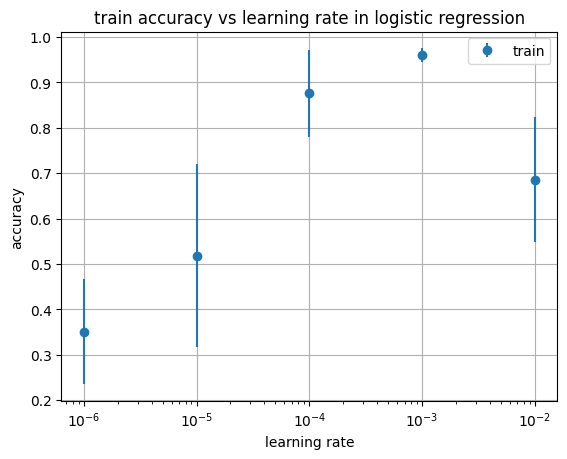

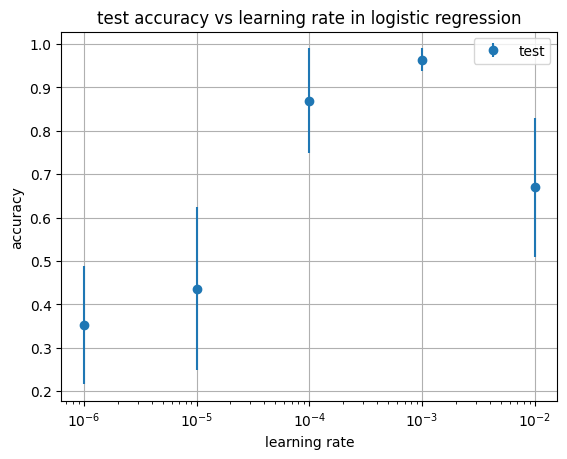

In [ ]:
diff_lr()

### 3.3 Best Classifier

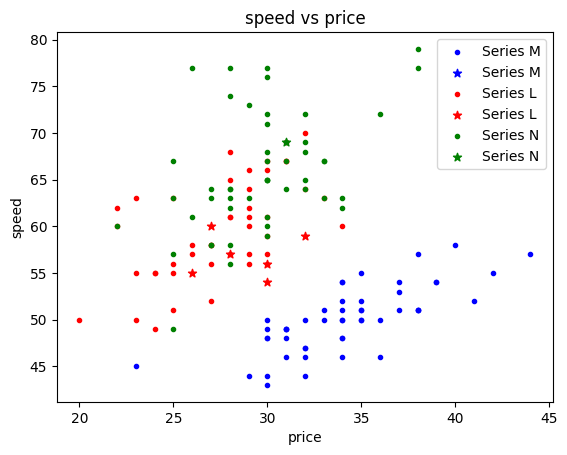

(0.9666666666666667, 0.9)

In [ ]:
expermiment_3(0.5, 0.5, 0.001, 1000, plot=True)

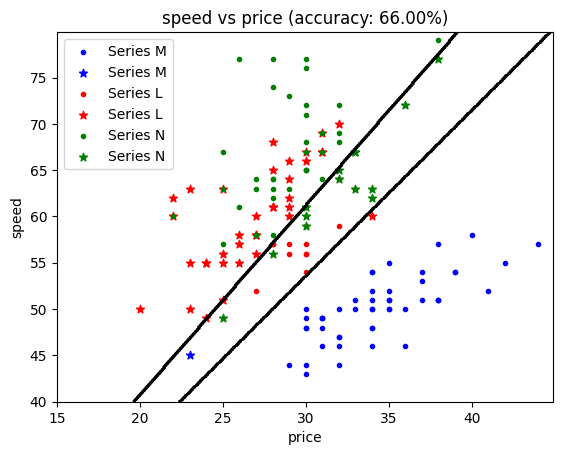

In [ ]:
def optlogi():
    X_train = dataset_1.iloc[:, :3] # adding Unnamed: 0 and will make it all 1
    X_train = X_train.values
    # adding a collumn of one in X
    X_train[:, 0] = 1
    Y_train  = dataset_1['Model']
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L', 'Series N']].values
    Y_train = Y_train.astype(float)
    model = Elastic_net_logistic_regression(X_train.shape[1], Y_train.shape[1], 0.5, 0)
    model.train(X_train, Y_train, 0.001, 1000)
    y_pred = model.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', label = 'Series M', marker = '*')
    plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', label = 'Series L', marker = '*')
    plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 2][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 1][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', label = 'Series N', marker = '*')
    acc = np.sum(Y_train == y_pred) / len(Y_train)
    # print(f'accuracy: {acc}%')
    plt.title(f'speed vs price (accuracy: {acc*100:.2f}%)')
    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()

    g = []
    for i in np.arange(40, 80, 0.1):
        a = np.ones((300, 3))
        a[:, 2] = np.arange(15, 45, 0.1)
        a[:, 1] = i
        g.append(a)
    g = np.array(g)

    descionboundry_classification(g, model, 2, 1)
    plt.show()
optlogi()

### 3.4 Accuracy for diffrent alpha and lambda

lamda value: 0.0
lamda value: 0.1
lamda value: 0.2
lamda value: 0.3
lamda value: 0.4
lamda value: 0.5
lamda value: 0.6
lamda value: 0.7
lamda value: 0.8
lamda value: 0.9
lamda value: 1.0


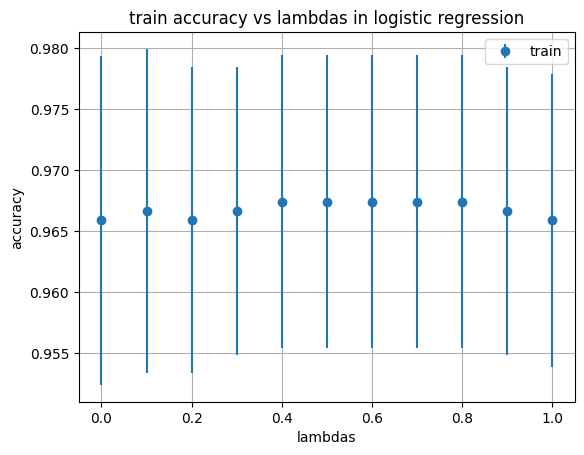

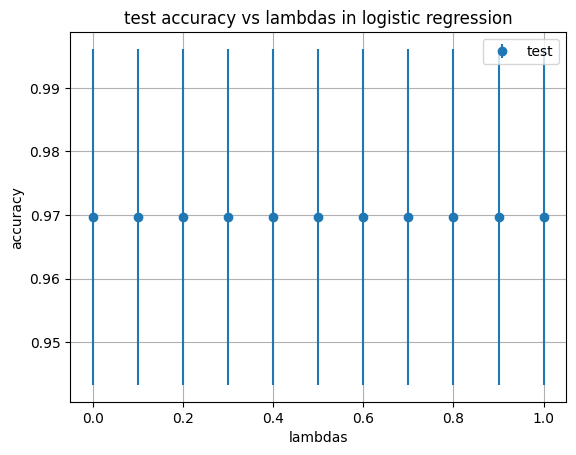

In [ ]:
def accvslambda():
    lambs = [(i/10) for i in range(11)]
    train_acc_mean = []
    test_acc_mean = []
    train_acc_std = []
    test_acc_std = []
    for lamb in lambs:
        print(f"lamda value: {lamb}")
        train, test, train_std, test_std = expermiment_3_10(0, lamb, 1e-3, 1000)
        train_acc_mean.append(train)
        test_acc_mean.append(test)
        train_acc_std.append(train_std)
        test_acc_std.append(test_std)
    plt.errorbar(lambs, train_acc_mean, yerr=train_acc_std, fmt='o', label='train')
    plt.xlabel('lambdas')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('train accuracy vs lambdas in logistic regression')
    plt.grid()
    plt.show()
    plt.errorbar(lambs, test_acc_mean, yerr=test_acc_std, fmt='o', label='test')
    plt.xlabel('lambdas')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('test accuracy vs lambdas in logistic regression')
    plt.grid()
    plt.show()
accvslambda()

alpha value: 0.0
alpha value: 0.1
alpha value: 0.2
alpha value: 0.3
alpha value: 0.4
alpha value: 0.5
alpha value: 0.6
alpha value: 0.7
alpha value: 0.8
alpha value: 0.9
alpha value: 1.0


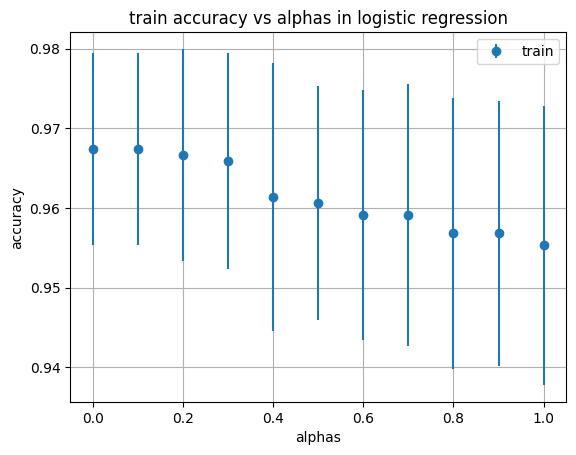

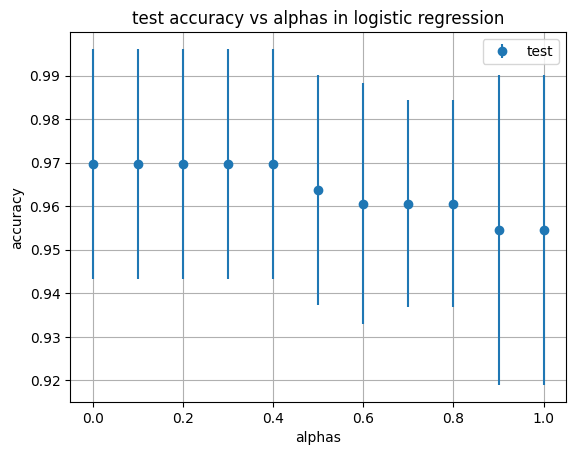

In [ ]:
def accvsalpha():
    alphas = [(i/10) for i in range(11)]
    train_acc_mean = []
    test_acc_mean = []
    train_acc_std = []
    test_acc_std = []
    for alpha in alphas:
        print(f"alpha value: {alpha}")
        train, test, train_std, test_std = expermiment_3_10(alpha, 0.5, 1e-3, 1000)
        train_acc_mean.append(train)
        test_acc_mean.append(test)
        train_acc_std.append(train_std)
        test_acc_std.append(test_std)
    plt.errorbar(alphas, train_acc_mean, yerr=train_acc_std, fmt='o', label='train')
    plt.xlabel('alphas')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('train accuracy vs alphas in logistic regression')
    plt.grid()
    plt.show()
    plt.errorbar(alphas, test_acc_mean, yerr=test_acc_std, fmt='o', label='test')
    plt.xlabel('alphas')
    plt.ylabel('accuracy')
    plt.legend()
    plt.title('test accuracy vs alphas in logistic regression')
    plt.grid()
    plt.show()
accvsalpha()

 ## 4. Vanila Regression vs Elastic Regressor

In [ ]:
elastic_mean_train, elastic_mean_test, elastic_std_train, elastic_std_test = expermiment_3_10(0.3, 0.8, 0.001, 1000)
logistic_mean_train, logistic_mean_test, logistic_std_train, logistic_std_test = expermiment_3_10(0, 0, 0.001, 1000) # logistic regression is a special case of elastic net with lamb = 0
print(f"ELASTIC NET with alpha = 0.3 and lambda = 0.8")
print(f'elastic net mean train accuracy: {elastic_mean_train: .2f}')
print(f'elastic net mean test accuracy: {elastic_mean_test: .2f}')
print(f'elastic net standard deviation train accuracy: {elastic_std_train: .2f}')
print(f'elastic net standard deviation test accuracy: {elastic_std_test: .2f}')
print()
print("LOGISTIC REGRESSION")
print(f'logistic mean train accuracy: {logistic_mean_train: .2f}')
print(f'logistic mean test accuracy: {logistic_mean_test:.2f}')
print(f'logistic standard deviation train accuracy: {logistic_std_train:2f}')
print(f'logistic standard deviation test accuracy: {logistic_std_test:.2f}')


ELASTIC NET with alpha = 0.3 and lambda = 0.8
elastic net mean train accuracy:  0.96
elastic net mean test accuracy:  0.97
elastic net standard deviation train accuracy:  0.01
elastic net standard deviation test accuracy:  0.02

LOGISTIC REGRESSION
logistic mean train accuracy:  0.97
logistic mean test accuracy: 0.97
logistic standard deviation train accuracy: 0.013510
logistic standard deviation test accuracy: 0.03


# TASK 2

**TASK 2**: SVM                         **(33 Marks)**

Let's use the same dataset_1.csv for this task. It can be observed that the data was not perfectly linearly seperable with logistic classfier. One-vs-Rest (OVR) SVM, is an approach used in multiclass classification tasks. In this strategy, a separate binary support vector machine (SVM) classifier is trained for each class in the dataset, treating it as the positive class while considering all other classes as the negative class. **Reference:** Slide 21 of [OVR SVM](https://www.cse.iitk.ac.in/users/piyush/courses/ml_autumn18/material/771_A18_lec11_print.pdf)

1. Implement a OVR SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (5 + 2 + 2 + 2 + 2 + 2 Marks)

2. Try to fit a non linear SVM say polynomial kernel (degree=$3$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (2+2+2+3+2+2 Marks)

3. Evaluate your classifier performance using precision, recall and f1-score. Report your observations. **Note:** You can use [sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html) metrics for this part only. (3+2 Marks)

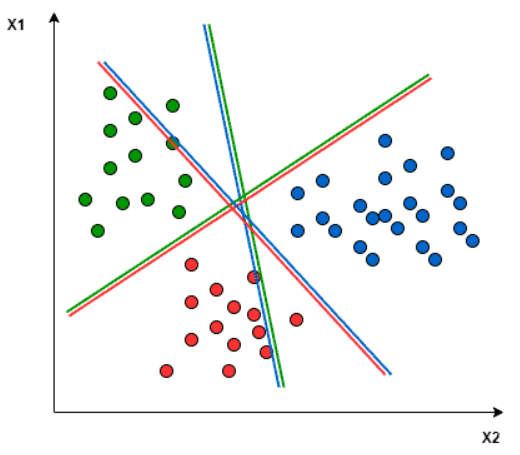

**Note:**

**Confusion Matrix:** A confusion matrix is a performance measurement tool used in classification problems, particularly in machine learning. It provides a detailed breakdown of the model's predictions, allowing the assessment of the model's accuracy and error types.

**Precision:** Precision measures the accuracy of the positive predictions made by the model.

**Recall:** Recall measures the ability of the model to capture all the positive instances in the dataset.

**F1-score:** The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, taking into account both false positives and false negatives. The F1 score is useful when there is an uneven class distribution and a need to consider trade-offs between precision and recall.


Write your code by creating cells below.



## 1. OVR SVM and optimal C

In [ ]:
class SVM:
    def __init__(self, reg_param = 0.01, kernel = 'linear', gamma = 0.01, degree = 3):
        """
            reg_param: float
            kernel = function that takes two x values as input and outputs the phi.T (x) phi (x) value
        """
        self.C = reg_param
        if kernel=='linear':
            kernel = self.lineark
        elif kernel=='polynomial':
            kernel = self.polyk
            self.degree = degree
        else:
            kernel = self.rbfk
            self.gamma = gamma
        self.kernel = kernel
        self.alphas = []
        self.X_train = None
        self.Y_train = None
        self.bs = []

    def rbfk(self, x1, x2):
        return np.exp(-self.gamma * np.sum((x1 - x2)**2))

    def lineark(self, x1, x2):
        return np.dot(x1, x2)

    def polyk(self, x1, x2):
        return (1 + np.dot(x1, x2)) ** self.degree

    def ovr(self, train_k, Y_train):

        n = len(Y_train)
        # k = self.X_train.T * Y_train.reshape([1, n])
        # print(np.sum(train_k))

        p = matrix(train_k * np.outer(Y_train, Y_train))
        q = matrix(-1*np.ones(n))
        G = matrix(np.concatenate([np.eye(n), -np.eye(n)], axis = 0))
        h = matrix(np.concatenate([self.C * np.ones([n,1]) , np.zeros([n, 1])] , axis = 0))
        A = matrix(Y_train.reshape(1, -1).astype(np.double))
        b = matrix(np.zeros(1))
        #print(p, q, G, h, A, b)
        solvers.options['show_progress'] = False
        # print("p", np.array(p))
        # print("q", np.array(q))
        # print('G', np.array(G))
        # print('h', np.array(h))
        # print('A', np.array(A))
        # print('b', np.array(b))

        sol = solvers.qp(p, q, G, h, A, b) # will give A, b later
        return np.array(sol['x']).flatten()


    def train(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        # print(self.kernel)
        train_k = np.array([[self.kernel(xi, xj) for xj in X_train] for xi in X_train])
        for i in range(Y_train.shape[1]):
            alpha = self.ovr(train_k, Y_train[:, i])
            self.alphas.append(alpha)
            support_vector = alpha > 1e-5
            if np.sum(support_vector) == 0:
                self.bs.append(0)
                continue
            b = np.mean(Y_train[:, i][support_vector] - np.sum(train_k[support_vector][:, support_vector] * Y_train[:, i][support_vector] * alpha[support_vector], axis = 1))
            self.bs.append(b)

        self.bs = np.array(self.bs)
        self.alphas = np.array(self.alphas)


    def wtx(self, X_test):
        support_vectors = [alpha > 1e-5 for alpha in self.alphas] # getting the support vectors
        def wtx_one(x):
            ans = []
            for i in range(len(self.alphas)):
                l = np.array([self.kernel(xi, x) for xi in self.X_train[support_vectors[i]]])
                ans.append(np.sum(l * self.Y_train[:, i][support_vectors[i]] * self.alphas[i][support_vectors[i]]))
            return np.array(ans)

        return np.apply_along_axis(wtx_one, 1, X_test)

    def predict(self, X_test):
        return self.wtx(X_test) + self.bs

In [ ]:
def optC(seed = 43):
    np.random.seed(seed)
    train_data, test_data = train_test_split(dataset_1.values, frac = 1)
    X_train = train_data[:, 1:5].astype(float)
    Y_train = train_data[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    # X_test = test_data[:, 1:5].astype(float)
    # Y_test = test_data[:, 5]
    # Y_test = pd.get_dummies(Y_test)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    # Y_train[Y_train == 0] = -1

    Cs = [1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    no_of_support_vectors = []
    accs = []
    accs_test = []
    for C in Cs:
        print(f"C value: {C}")
        model = SVM(reg_param = C)
        model.train(X_train, Y_train)
        y_pred = model.predict(X_train)
        no_of_support_vectors.append(sum([np.sum(a > 1e-5) for a in model.alphas])) # calculating no of support vectors
        accs.append(int(len(Y_train) - accuracy(Y_train, y_pred)*len(Y_train))) # no of misclassifed points
        # y_pred_test = model.predict(X_test)
        # accs_test.append(int(len(Y_test) - accuracy(Y_test, y_pred_test)*len(Y_test)))

    plt.scatter(Cs, accs)
    plt.grid()
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('No of Misclassified points')
    plt.title('Variation No of Misclassified points with C in OVR SVM')
    plt.show()

    # plt.scatter(Cs, accs_test)
    # plt.grid()
    # plt.xscale('log')
    # plt.xlabel('C')
    # plt.ylabel('No of Misclassified points')
    # plt.title('Test Variation accuracy with C in OVR SVM')
    # plt.show()

    plt.scatter(Cs, no_of_support_vectors)
    plt.grid()
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('No of Support vectors')
    plt.title('Variation of Number of support vectors with C in OVR SVM')
    plt.show()




C value: 1000
C value: 100
C value: 10
C value: 1
C value: 0.1
C value: 0.01
C value: 0.001
C value: 0.0001


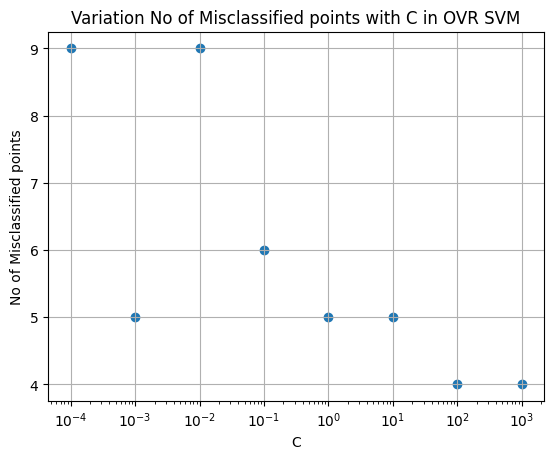

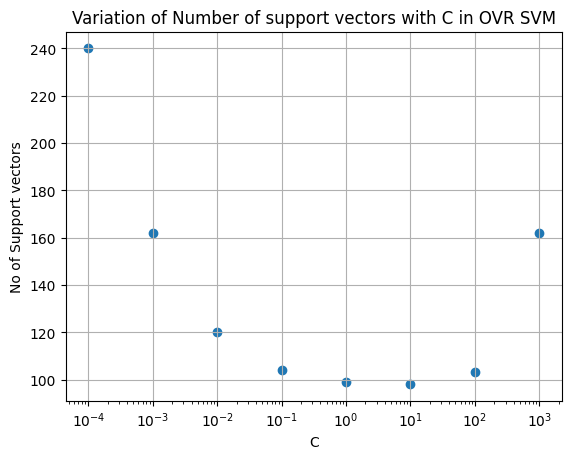

In [ ]:
optC(565)

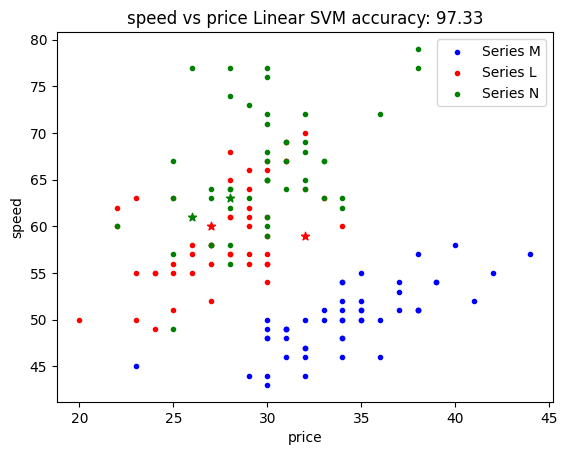

In [ ]:
def optsvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:5].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 100)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')


    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price Linear SVM accuracy: {(np.sum(Y_train == y_pred) / len(Y_train))*100:.2f}')
    plt.show()

optsvm()

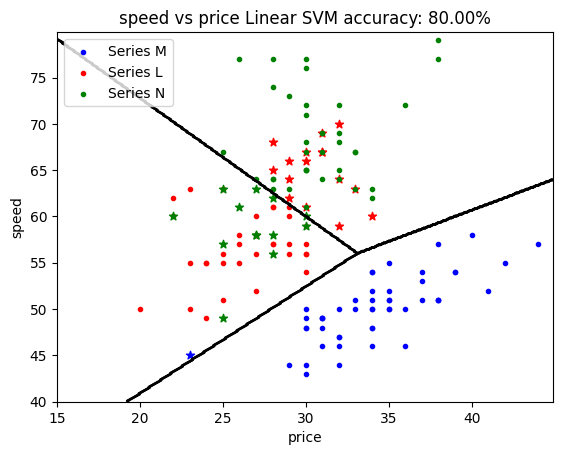

In [ ]:
def only2variablesvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:3].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 100)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)


    g = []
    for i in np.arange(40, 80, 0.1):
        a = np.ones((300, 2))
        a[:, 1] = np.arange(15, 45, 0.1)
        a[:, 0] = i
        g.append(a)
    g = np.array(g)

    descionboundry_classification(g, mo, 1, 0)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')
    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price Linear SVM accuracy: {(np.sum(Y_train==y_pred)/len(Y_train))*100:.2f}%')
    plt.show()
only2variablesvm()

## 2, 3 RBF, Polynomial Kernel and Comparision

gamma value: 10


<ipython-input-41-1192467529fd>:23: RuntimeWarning: underflow encountered in exp
  return np.exp(-self.gamma * np.sum((x1 - x2)**2))
<ipython-input-41-1192467529fd>:68: RuntimeWarning: underflow encountered in multiply
  b = np.mean(Y_train[:, i][support_vector] - np.sum(train_k[support_vector][:, support_vector] * Y_train[:, i][support_vector] * alpha[support_vector], axis = 1))
<ipython-input-41-1192467529fd>:81: RuntimeWarning: underflow encountered in multiply
  ans.append(np.sum(l * self.Y_train[:, i][support_vectors[i]] * self.alphas[i][support_vectors[i]]))


gamma value: 1
gamma value: 0.1
gamma value: 0.01
gamma value: 0.001
gamma value: 0.0001
gamma value: 1e-05
gamma value: 1e-06


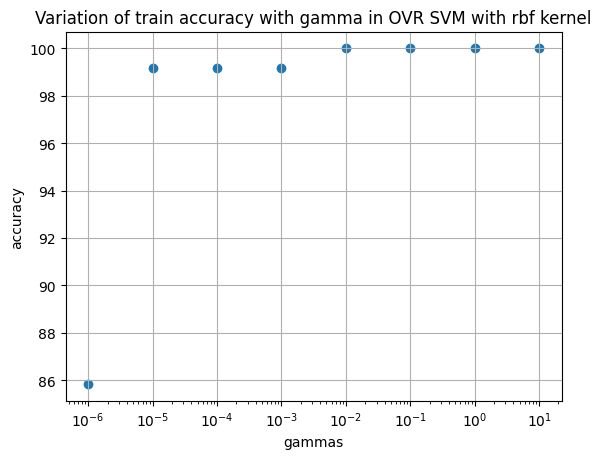

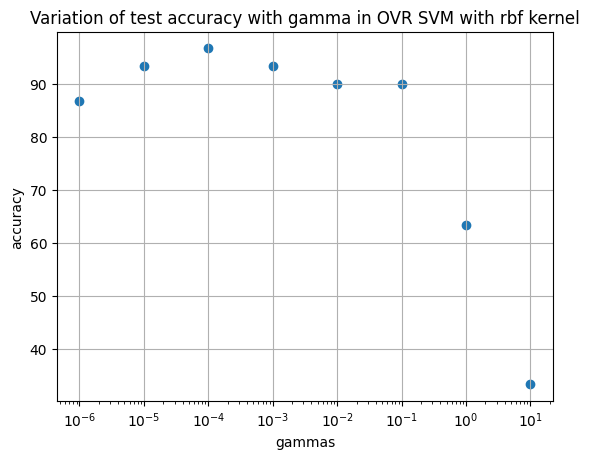

In [ ]:
def optgamma():
    np.random.seed(0)
    data_train, data_test = train_test_split(dataset_1.values)
    X_train = data_train[:, 1:5].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    X_test = data_test[:, 1:5].astype(float)
    Y_test = data_test[:, 5]
    Y_test = pd.get_dummies(Y_test)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_test[Y_test == 0] = -1

    gammas = [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
    train_accs = []
    test_accs = []
    for gamma in gammas:
        print(f"gamma value: {gamma}")
        model = SVM(kernel = 'rbf',gamma = gamma, reg_param=100)
        model.train(X_train, Y_train)
        y_pred_train = model.predict(X_train)
        train_accs.append(accuracy(Y_train, y_pred_train)*100)
        y_pred_test = model.predict(X_test)
        test_accs.append(accuracy(Y_test, y_pred_test) * 100)
    plt.scatter(gammas, train_accs)
    plt.grid()
    plt.xscale('log')
    plt.xlabel('gammas')
    plt.ylabel('accuracy')
    plt.title('Variation of train accuracy with gamma in OVR SVM with rbf kernel')
    plt.show()

    plt.scatter(gammas, test_accs)
    plt.grid()
    plt.xscale('log')
    plt.xlabel('gammas')
    plt.ylabel('accuracy')
    plt.title('Variation of test accuracy with gamma in OVR SVM with rbf kernel')
    plt.show()

optgamma()

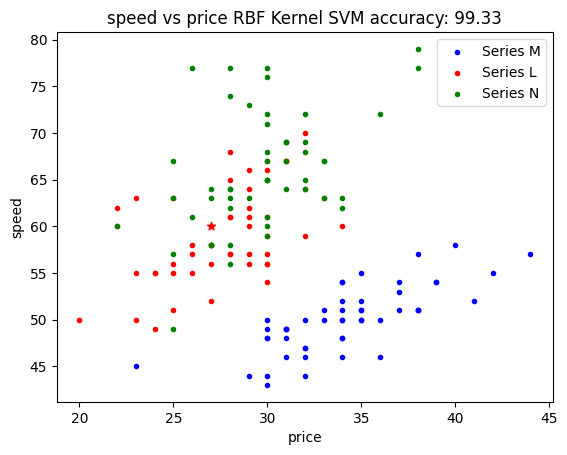

In [ ]:
def optrbfsvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:5].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 100, kernel = 'rbf', gamma = 0.01)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')


    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price RBF Kernel SVM accuracy: {(np.sum(Y_train == y_pred) / len(Y_train))*100:.2f}')
    plt.show()

optrbfsvm()

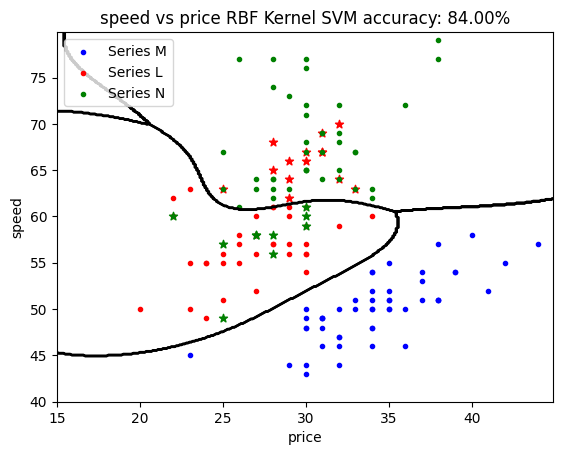

In [ ]:
def only2variablerbfsvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:3].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 100, kernel = 'rbf', gamma = 1e-2)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)

    g = []
    for i in np.arange(40, 80, 0.1):
        a = np.ones((300, 2))
        a[:, 1] = np.arange(15, 45, 0.1)
        a[:, 0] = i
        g.append(a)
    g = np.array(g)

    descionboundry_classification(g, mo, 1, 0)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')
    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price RBF Kernel SVM accuracy: {(np.sum(Y_train==y_pred)/len(Y_train))*100:.2f}%')
    plt.show()
only2variablerbfsvm()

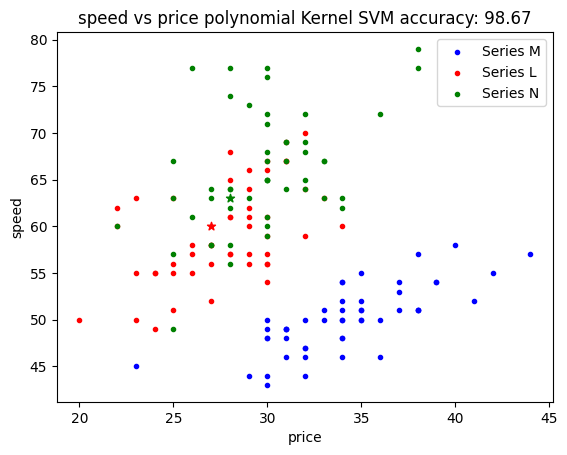

In [ ]:
def optpolysvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:5].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 1e-2, kernel = 'polynomial', degree = 2)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')


    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price polynomial Kernel SVM accuracy: {(np.sum(Y_train == y_pred) / len(Y_train))*100:.2f}')
    plt.show()

optpolysvm()

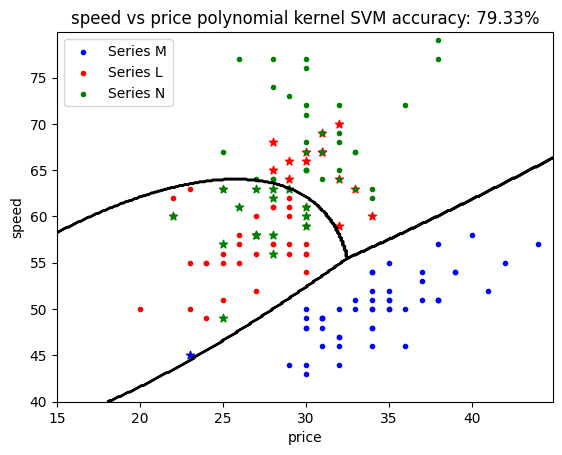

In [ ]:
def only2variablepolysvm():
    data_train = dataset_1.values
    X_train = data_train[:, 1:3].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    mo = SVM(reg_param = 1e-2, kernel = 'polynomial', degree = 2)
    mo.train(X_train , Y_train)
    y_pred = mo.predict(X_train)
    Y_train = np.argmax(Y_train, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)


    g = []
    for i in np.arange(40, 80, 0.1):
        a = np.ones((300, 2))
        a[:, 1] = np.arange(15, 45, 0.1)
        a[:, 0] = i
        g.append(a)
    g = np.array(g)

    descionboundry_classification(g, mo, 1, 0)
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train==y_pred)], color = 'blue', label = 'Series M', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 0) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 0) * (Y_train!=y_pred)], color = 'blue', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train==y_pred)], color = 'red', label = 'Series L', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 1) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 1) * (Y_train!=y_pred)], color = 'red', marker = '*')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train == y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train==y_pred)], color = 'green', label = 'Series N', marker = '.')
    plt.scatter(X_train[:, 1][(Y_train == 2) * (Y_train != y_pred)], X_train[:, 0][(Y_train == 2) * (Y_train!=y_pred)], color = 'green', marker = '*')
    plt.xlabel('price')
    plt.ylabel('speed')
    plt.legend()
    plt.title(f'speed vs price polynomial kernel SVM accuracy: {(np.sum(Y_train==y_pred)/len(Y_train))*100:.2f}%')
    plt.show()
only2variablepolysvm()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
def diffsvmComparision():
    # Creating Models
    linear_svm = SVM(reg_param = 100, kernel='linear')
    rbf_svm = SVM(kernel = 'rbf', gamma = 1e-4, reg_param = 100)
    poly_svm = SVM(kernel = 'polynomial', degree = 2, reg_param = 100)

    # Splitting the data
    np.random.seed(0)
    data_train, data_test = train_test_split(dataset_1.values)
    X_train = data_train[:, 1:5].astype(float)
    Y_train = data_train[:, 5]
    Y_train = pd.get_dummies(Y_train)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_train[Y_train == 0] = -1
    X_test = data_test[:, 1:5].astype(float)
    Y_test = data_test[:, 5]
    Y_test = pd.get_dummies(Y_test)[['Series M', 'Series L' ,'Series N']].values.astype(float)
    Y_test[Y_test == 0] = -1

    # Training the models
    linear_svm.train(X_train, Y_train)
    rbf_svm.train(X_train, Y_train)
    poly_svm.train(X_train, Y_train)

    # Predicting the values
    y_pred_linear_train = linear_svm.predict(X_train)
    y_pred_rbf_train = rbf_svm.predict(X_train)
    y_pred_poly_train = poly_svm.predict(X_train)
    y_pred_linear_test = linear_svm.predict(X_test)
    y_pred_rbf_test = rbf_svm.predict(X_test)
    y_pred_poly_test = poly_svm.predict(X_test)

    # Calculating the accuracies
    linear_train_acc = accuracy(Y_train, y_pred_linear_train)
    rbf_train_acc = accuracy(Y_train, y_pred_rbf_train)
    poly_train_acc = accuracy(Y_train, y_pred_poly_train)
    linear_test_acc = accuracy(Y_test, y_pred_linear_test)
    rbf_test_acc = accuracy(Y_test, y_pred_rbf_test)
    poly_test_acc = accuracy(Y_test, y_pred_poly_test)

    Y_train = np.argmax(Y_train, axis = 1)
    y_pred_linear_train = np.argmax(y_pred_linear_train, axis = 1)
    y_pred_rbf_train = np.argmax(y_pred_rbf_train, axis = 1)
    y_pred_poly_train = np.argmax(y_pred_poly_train, axis = 1)
    Y_test = np.argmax(Y_test, axis = 1)
    y_pred_linear_test = np.argmax(y_pred_linear_test, axis = 1)
    y_pred_rbf_test = np.argmax(y_pred_rbf_test, axis = 1)
    y_pred_poly_test = np.argmax(y_pred_poly_test, axis = 1)

    linear_train_precision = precision_score(Y_train, y_pred_linear_train, average='weighted')
    rbf_train_precision = precision_score(Y_train, y_pred_rbf_train, average='weighted')
    poly_train_precision = precision_score(Y_train, y_pred_poly_train, average='weighted')
    linear_test_precision = precision_score(Y_test, y_pred_linear_test, average='weighted')
    rbf_test_precision = precision_score(Y_test, y_pred_rbf_test, average='weighted')
    poly_test_precision = precision_score(Y_test, y_pred_poly_test, average='weighted')
    linear_train_recall = recall_score(Y_train, y_pred_linear_train, average='weighted')
    rbf_train_recall = recall_score(Y_train, y_pred_rbf_train, average='weighted')
    poly_train_recall = recall_score(Y_train, y_pred_poly_train, average='weighted')
    linear_test_recall = recall_score(Y_test, y_pred_linear_test, average='weighted')
    rbf_test_recall = recall_score(Y_test, y_pred_rbf_test, average='weighted')
    poly_test_recall = recall_score(Y_test, y_pred_poly_test, average='weighted')
    linear_train_f1 = f1_score(Y_train, y_pred_linear_train, average='weighted')
    rbf_train_f1 = f1_score(Y_train, y_pred_rbf_train, average='weighted')
    poly_train_f1 = f1_score(Y_train, y_pred_poly_train, average='weighted')
    linear_test_f1 = f1_score(Y_test, y_pred_linear_test, average='weighted')
    rbf_test_f1 = f1_score(Y_test, y_pred_rbf_test, average='weighted')
    poly_test_f1 = f1_score(Y_test, y_pred_poly_test, average='weighted')


    print("LINEAR SVM  with C = 100")
    print(f'linear train accuracy: {linear_train_acc: .2f}')
    print(f'linear test accuracy: {linear_test_acc:.2f}')
    print(f'linear train precision: {linear_train_precision: .2f}')
    print(f'linear test precision: {linear_test_precision:.2f}')
    print(f'linear train recall: {linear_train_recall: .2f}')
    print(f'linear test recall: {linear_test_recall:.2f}')
    print(f'linear train f1: {linear_train_f1: .2f}')
    print(f'linear test f1: {linear_test_f1:.2f}')

    print()
    print("RBF SVM with gamma = 0.0001 and C = 100")
    print(f'rbf train accuracy: {rbf_train_acc: .2f}')
    print(f'rbf test accuracy: {rbf_test_acc:.2f}')
    print(f'rbf train precision: {rbf_train_precision: .2f}')
    print(f'rbf test precision: {rbf_test_precision:.2f}')
    print(f'rbf train recall: {rbf_train_recall: .2f}')
    print(f'rbf test recall: {rbf_test_recall:.2f}')
    print(f'rbf train f1: {rbf_train_f1: .2f}')
    print(f'rbf test f1: {rbf_test_f1:.2f}')

    print()
    print("POLYNOMIAL SVM with degree = 2 with C = 100")
    print(f'polynomial train accuracy: {poly_train_acc: .2f}')
    print(f'polynomial test accuracy: {poly_test_acc:.2f}')
    print(f'polynomial train precision: {poly_train_precision: .2f}')
    print(f'polynomial test precision: {poly_test_precision:.2f}')
    print(f'polynomial train recall: {poly_train_recall: .2f}')
    print(f'polynomial test recall: {poly_test_recall:.2f}')
    print(f'polynomial train f1: {poly_train_f1: .2f}')
    print(f'polynomial test f1: {poly_test_f1:.2f}')



diffsvmComparision()

LINEAR SVM  with C = 100
linear train accuracy:  0.97
linear test accuracy: 0.93
linear train precision:  0.98
linear test precision: 0.95
linear train recall:  0.97
linear test recall: 0.93
linear train f1:  0.98
linear test f1: 0.93

RBF SVM with gamma = 0.0001 and C = 100
rbf train accuracy:  0.99
rbf test accuracy: 0.97
rbf train precision:  0.99
rbf test precision: 0.97
rbf train recall:  0.99
rbf test recall: 0.97
rbf train f1:  0.99
rbf test f1: 0.97

POLYNOMIAL SVM with degree = 2 with C = 100
polynomial train accuracy:  1.00
polynomial test accuracy: 0.90
polynomial train precision:  1.00
polynomial test precision: 0.92
polynomial train recall:  1.00
polynomial test recall: 0.90
polynomial train f1:  1.00
polynomial test f1: 0.90


# TASK 3

**TASK 3**: Decision Tree and Gradient Boosted Trees                      **(27 Marks)**

### **Gradient Boosted Trees**

**Decision Trees:** Decision trees are the base learners used in GBT. These are simple tree-like structures where each internal node represents a decision based on a feature, and each leaf node represents the output label. Each decision tree in the ensemble is trained on a subset of the data.

**Boosting:** GBT uses boosting, a technique where each subsequent model tries to correct the errors made by the previous ones. In boosting, the models are trained sequentially, and at each iteration, the new model focuses on the examples that were misclassified by the previous models.

**Gradient Descent:** In GBT, the boosting process involves gradient descent optimization. During each iteration, the algorithm calculates the gradient of the loss function with respect to the ensemble's prediction. Then, it fits a new decision tree to the gradient values (residuals), effectively reducing the errors made by the previous models.

**Gradient Boosting:** In gradient boosting, the idea is to fit the new model (in this case, a decision tree) to the residual errors of the previous model. This means that each new tree is trained to predict the residuals, which are the differences between the actual values and the predictions of the ensemble so far.

**Learning Rate:** GBT introduces a parameter called the learning rate, which controls the contribution of each tree to the ensemble. A smaller learning rate makes the model more robust but requires more trees to be added to the ensemble.

**Ensemble Aggregation:** The final prediction of the GBT model is obtained by aggregating the predictions of all the individual decision trees (each is a form of weak learner) in the ensemble, typically through a weighted sum.

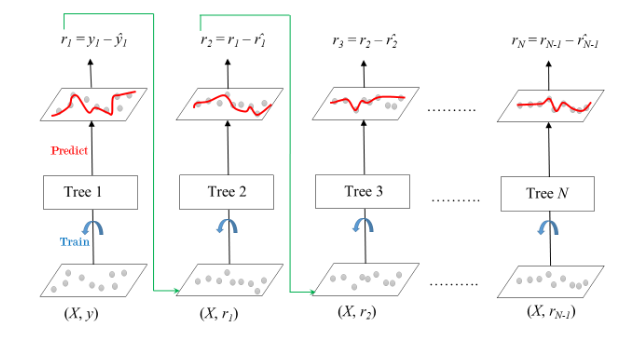


Now lets change the dataset and load dataset given below.

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing a bank clients. Load the dataset "bank_data.csv". The task is to predict whether the client defined by the given set of attributes earns will subscirbe to a term deposit. Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the client defined by the given set of attributes earns will subscirbe to a term deposit or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (7 + 1 + 3 Marks)

2. Create 10 weak learners using code for the decision tree written previously.
If your model overfits or underfits then you can decrease or increase the number of weak learners. To optimize the ensemble there is going to be a trade off between learning rate and number of weak learners. Try to find the optimal learning rate and number of weak learners.  (5 + 6 Marks)

 y(pred) = (lr *  r1) + (lr * r2) + ....... + (lr * rN)

 Report the error on final prediction by using the formula given above. Did the performance improve? Report your findings. (You can fix number of nodes as best value obtained in previous part). (5 Marks)

Write your code by creating cells below.

## 1

### Descion Tree

In [ ]:
class Node:
    def __init__(self, data, depth, left = None, right = None, leaf = True, index = None, threshold = None):
        """
            Input: data: bool np.array, depth: int, left: Node, right: Node, leaf: bool
            Output: None
        """
        self.data = data
        self.depth = depth
        self.left = left
        self.right = right
        self.leaf = leaf
        self.index = index
        self.threshold = threshold

    def next_node(self, x):
        """
            Input: x: np.array
            Output: Node
        """
        if self.leaf:
            return None
        if x[self.index] <= self.threshold:
            return self.left
        else:
            return self.right


class Decsion_Trees_Classifier:
    def __init__(self, X_train, Y_train, max_depth = 5, min_samples = 2, param = 'entropy'):
        """
            X_train: np.array, Y_train: np.array, max_depth: int, min_samples: int, param: entropy / rss
        """
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.X_train = X_train
        self.Y_train = Y_train
        self.root = Node(np.arange(len(X_train)), 0)
        self.tree_depth = 0
        self.param = param
        self.no_nodes = 1

    def rss(self, y):
        if len(y)==0:
            return 0
        return np.sum((y - np.mean(y, axis = 0)) ** 2)

    def entorpy(self, y):
        """
            Input: y: np.array
            Output: float entropy
            # can only be used if output variable value is 0 and 1
        """
        if(len(y)==0):
            return 0
        if(len(y.shape) == 1): # for sinlge class
            p1 = np.sum(y) / len(y)
            p2 = 1 - p1
            return - (p1*np.log2(p1) + p2*np.log2(p2)) if (p1!=0 and p2!=0) else 0
        # for multiclass
        counts = np.sum(y, axis = 0)
        pr = counts + 1e-10 / np.sum(counts + 1e-10)
        return np.sum(pr*np.log2(pr))

    def info_gain(self, curr_y, left_y, right_y):

        if self.param == 'entropy':
            child_entroy = (len(left_y) * self.entorpy(left_y) + len(right_y) * self.entorpy(right_y)) / len(curr_y)
            return child_entroy

        child_rss = ((self.rss(left_y)) + self.rss(right_y))
        return child_rss

    def split(self, x, threshold):
        """
            Input: x: np.array, threshold: float/string
            Output: bool np.array, bool np.array:
        """
        if (type(threshold) == str):
            left = x == threshold
            right = x != threshold
        else:
            left = x <= threshold
            right = x > threshold

        return left, right

    def split_Node(self, node):
        """
            Input: node: Node
            Output: Node, Node
        """
        if(len(node.data)<=self.min_samples or node.depth >= self.max_depth):
            return None, None
        X = self.X_train[node.data]
        Y = self.Y_train[node.data]
        best_gain = float('inf')
        best_left = None
        best_right = None
        best_threshold = None
        best_index = None
        for i in range(X.shape[1]):
            thresholds = np.unique(X[:, i])
            # thresholds = thresholds[:-1] # removing the last thresholod cause no need
            for threshold in thresholds:
                left, right = self.split(X[:, i], threshold)
                gain = self.info_gain(Y, Y[left], Y[right])
                if gain < best_gain:
                    best_gain = gain
                    best_left = left
                    best_right = right
                    best_threshold = threshold
                    best_index = i
        # if best_gain == 0:
        #     return None, None

        node.index = best_index
        node.threshold = best_threshold
        node.left = Node(node.data[best_left], node.depth + 1)
        node.right = Node(node.data[best_right], node.depth + 1)
        node.leaf = False
        return node.left, node.right

    def build_tree(self, node):
        """
            Input: Node
            Output: None
        """
        # print(len(node.data), node.depth)
        self.tree_depth = max(self.tree_depth, node.depth)
        left, right = self.split_Node(node)
        if left:
            self.no_nodes += 1
            self.build_tree(left)
        if right:
            self.no_nodes += 1
            self.build_tree(right)

    def train(self):
        self.build_tree(self.root)

    def predict(self, X):
        """
            Predict for the whole Input
            Input: X: np.array Matrix of same shape as X_train
            Output: np.array of predictions each value is the problablity of that values prediction
            Output Format: For each example first value is the np.array of values and the second is the np.array of probabilities
        """
        def predict_one(x):
            node = self.root
            while not node.leaf:
                node = node.next_node(x)
            pr = np.mean(self.Y_train[node.data], axis = 0)
            return pr

        return np.apply_along_axis(predict_one, 1, X)



### Loss Vs No of Nodes

In [ ]:
def preprocess_data(data):
    """
        Input: data: pd data frame
        Output: np.array preprocessed data
    """
    str_col = []
    for col in data:
        if (type(data[col][0]) == str):
            str_col.append(col)
    return pd.get_dummies(data, columns = str_col).values.astype(float)

In [ ]:
def lossVSno_nodes(depths, seed = 10, param = 'entropy'):
    """
        Input: depths: list, X_train, Y_train, X_test, Y_test: np.array
        Output: list, list train and test loss on the given depths
    """
    np.random.seed(seed)
    train_data, test_data = train_test_split(preprocess_data(dataset_2), 0.8)
    xcol = train_data.shape[1] - 2
    X_train, Y_train = train_data[:, :xcol], train_data[:, -1]
    X_test, Y_test = test_data[:, :xcol], test_data[:, -1]
    train_loss = []
    test_loss = []
    no_nodes = []
    for depth in depths:
        model = Decsion_Trees_Classifier(X_train, Y_train, max_depth = depth, param=param)
        model.train()
        # print(Y_pred_test)
        Y_pred_test = model.predict(X_test) >= 0.5
        Y_pred_train = model.predict(X_train) >= 0.5
        test_loss.append(np.sum(Y_pred_test != Y_test) / len(Y_test))
        train_loss.append(np.sum(Y_pred_train != Y_train) / len(Y_train))
        no_nodes.append(model.no_nodes)
        print(depth, model.no_nodes)
        print(f"Error at Depth: {depth} is = {test_loss[-1]}")

    return no_nodes, train_loss, test_loss

0 1
Error at Depth: 0 is = 0.10718232044198896
1 3
Error at Depth: 1 is = 0.10718232044198896
2 7
Error at Depth: 2 is = 0.112707182320442
3 15
Error at Depth: 3 is = 0.10165745856353592
4 31
Error at Depth: 4 is = 0.10276243093922652
5 59
Error at Depth: 5 is = 0.09944751381215469
6 109
Error at Depth: 6 is = 0.10497237569060773
7 181
Error at Depth: 7 is = 0.10828729281767956
8 273
Error at Depth: 8 is = 0.10939226519337017
9 387
Error at Depth: 9 is = 0.112707182320442


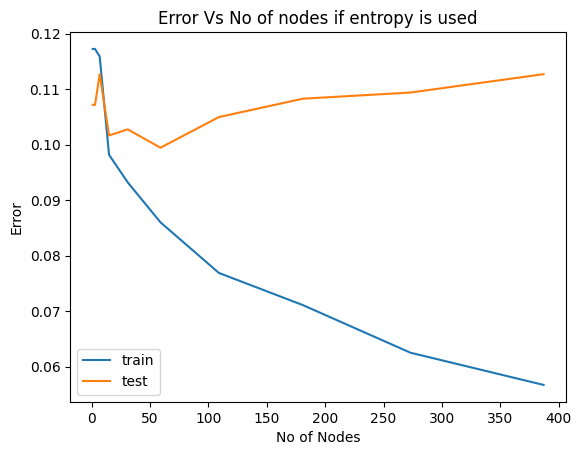

Best Test Loss: 0.09944751381215469 at depth: 5


In [ ]:
depths = [i for i in range(10)]
no_nodes, train_loss, test_loss = lossVSno_nodes(depths)
plt.plot(no_nodes, train_loss, label = 'train')
plt.plot(no_nodes, test_loss, label = 'test')

plt.xlabel('No of Nodes')
plt.ylabel('Error')
plt.title('Error Vs No of nodes if entropy is used')

plt.legend()
plt.show()
print(f"Best Test Loss: {min(test_loss)} at depth: {test_loss.index(min(test_loss))}")

0 1
Error at Depth: 0 is = 0.10718232044198896
1 3
Error at Depth: 1 is = 0.112707182320442
2 7
Error at Depth: 2 is = 0.10165745856353592
3 15
Error at Depth: 3 is = 0.10276243093922652
4 31
Error at Depth: 4 is = 0.09281767955801105
5 63
Error at Depth: 5 is = 0.09834254143646409
6 111
Error at Depth: 6 is = 0.10165745856353592
7 181
Error at Depth: 7 is = 0.1005524861878453
8 259
Error at Depth: 8 is = 0.10165745856353592
9 339
Error at Depth: 9 is = 0.09944751381215469


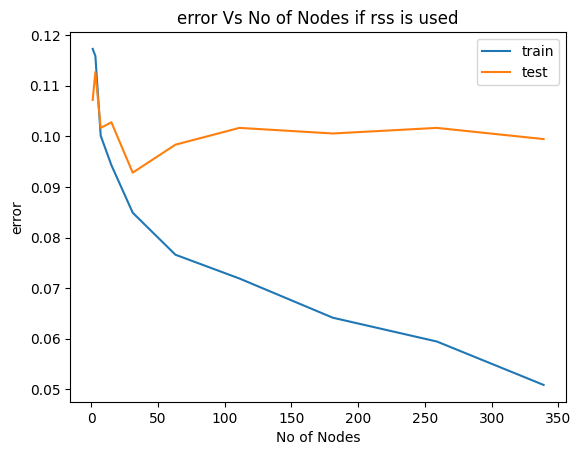

Best Test Loss: 0.09281767955801105 at depth: 4


In [ ]:
depths = [i for i in range(10)]
no_nodes, train_loss, test_loss = lossVSno_nodes(depths, param = 'rss')
plt.plot(no_nodes, train_loss, label = 'train')
plt.plot(no_nodes, test_loss, label = 'test')

plt.xlabel('No of Nodes')
plt.ylabel('error')
plt.title('error Vs No of Nodes if rss is used')

plt.legend()
plt.show()
print(f"Best Test Loss: {min(test_loss)} at depth: {test_loss.index(min(test_loss))}")

## 2

### Gradient Boosted trees

In [ ]:
class GBT:
    def __init__(self, n_tree = 10, lr = 1/10, max_depth = 4):
        self.n_trees = n_tree
        self.lr = lr
        self.max_depth = max_depth
        self.Dts = []

    def train(self, X_train, Y_train, X_test = None, Y_test = None):
        # dt = Decsion_Trees_Classifier(X_train, Y_train, max_depth = self.max_depth, param = 'rss')
        # dt.train()
        # self.Dts.append(dt)
        y_pred = np.zeros(Y_train.shape)
        testing_error_rate = []
        training_error_rate = []
        training_error_rate.append(np.sum(y_pred != Y_train) / len(Y_train))

        if isinstance(Y_test, np.ndarray):
            y_pred_test = np.zeros(Y_test.shape)
            testing_error_rate.append(np.sum(y_pred_test != Y_test) / len(Y_test))

        for t in range(self.n_trees):
            rs = Y_train - y_pred
            dt = Decsion_Trees_Classifier(X_train, rs, max_depth = self.max_depth, param = 'rss')
            dt.train()
            self.Dts.append(dt)
            u = dt.predict(X_train) # calculating the update that our tree is predicting
            y_pred += self.lr * u #updating the y_pred

            training_error_rate.append(np.sum( (y_pred >= 0.5) != Y_train) / len(Y_train))
            # if Test data is also given Doing this to reduce time complexity
            if isinstance(Y_test, np.ndarray):
                # this is specific to this data set
                y_pred_test += self.lr * dt.predict(X_test)
                testing_error_rate.append(np.sum( (y_pred_test >= 0.5) != Y_test) / len(Y_test))
                print(t, self.lr)
                print(testing_error_rate[-1], training_error_rate[-1])

        return training_error_rate, testing_error_rate



    def predict(self, X_test):
        if (len(self.Dts) == 0):
            print("No Descion Tree trained!")
            return
        pred = self.Dts[0].predict(X_test)
        for dt in self.Dts[1:]:
            pred += dt.predict(X_test)

        return self.lr * pred # multiplying at the end cause same lr for all the trees else O(n) time extra in each step

### Optimal Learning rate and number of trees

In [ ]:
def GBT_loss(lrs, n_trees, seed = 100, tree_depth = 4):

    np.random.seed(seed)
    train_data, test_data = train_test_split(preprocess_data(dataset_2), 0.8)
    xcol = train_data.shape[1] - 2
    X_train, Y_train = train_data[:, :xcol], train_data[:, -1]
    X_test, Y_test = test_data[:, :xcol], test_data[:, -1]
    losses_train = []
    losses_test = []

    for lr in lrs:
        print(lr)
        gbt = GBT(n_trees, lr, max_depth = tree_depth)

        tra, tes = gbt.train(X_train, Y_train, X_test, Y_test) # The GBT class is optimised to give the test loss as well at each value of no of trees trained

        losses_train.append(tra)
        losses_test.append(tes)

    return losses_train, losses_test

In [ ]:
lrs = [0.2, 0.5, 0.8]
losses_train, losses_test = GBT_loss(lrs, 50, tree_depth = 4)

0.2
0 0.2
0.11823204419889503 0.11449115044247787
1 0.2
0.11823204419889503 0.11449115044247787
2 0.2
0.11823204419889503 0.11449115044247787
3 0.2
0.11823204419889503 0.10425884955752213
4 0.2
0.11602209944751381 0.09872787610619468
5 0.2
0.11602209944751381 0.0956858407079646
6 0.2
0.1138121546961326 0.0918141592920354
7 0.2
0.11712707182320442 0.08545353982300885
8 0.2
0.11712707182320442 0.08296460176991151
9 0.2
0.11049723756906077 0.07826327433628319
10 0.2
0.11160220994475138 0.0752212389380531
11 0.2
0.11160220994475138 0.07300884955752213
12 0.2
0.10718232044198896 0.06913716814159292
13 0.2
0.10607734806629834 0.06830752212389381
14 0.2
0.10607734806629834 0.06581858407079647
15 0.2
0.10607734806629834 0.06498893805309734
16 0.2
0.10828729281767956 0.06415929203539823
17 0.2
0.10607734806629834 0.06332964601769911
18 0.2
0.10607734806629834 0.0625
19 0.2
0.10386740331491713 0.06222345132743363
20 0.2
0.10276243093922652 0.06028761061946902
21 0.2
0.10386740331491713 0.0586283

Min Test Error: 0.10165745856353592 at lr: 0.2
Min error at: 25
Min Test Error: 0.09502762430939227 at lr: 0.5
Min error at: 24
Min Test Error: 0.09502762430939227 at lr: 0.8
Min error at: 6


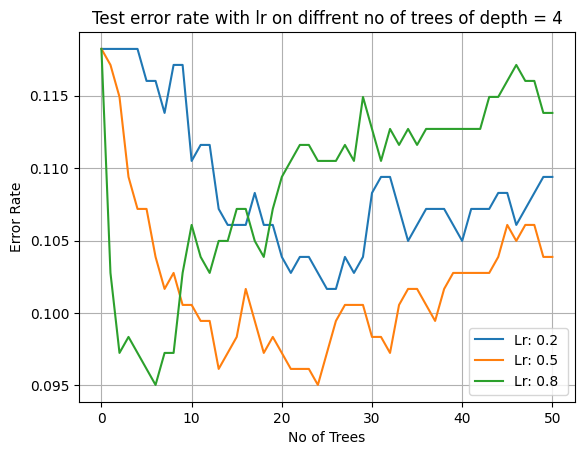

In [ ]:
for i in range(len(losses_test)):
    plt.plot(losses_test[i], label = f'Lr: {lrs[i]} ')
    print(f"Min Test Error: {min(losses_test[i])} at lr: {lrs[i]}")
    print(f"Min error at: {losses_test[i].index(min(losses_test[i]))}")
plt.title('Test error rate with lr on diffrent no of trees of depth = 4')
# plt.scatter(6, losses_test[1][6], label = f'Min Test Error: {losses_test[1][6]:.3}')
plt.grid()
plt.xticks()
plt.legend()
plt.xlabel('No of Trees')
plt.ylabel('Error Rate')

plt.show()

Min Train Error: 0.04231194690265487 at lr: 0.2
Min Train Error: 0.020741150442477877 at lr: 0.5
Min Train Error: 0.011891592920353982 at lr: 0.8


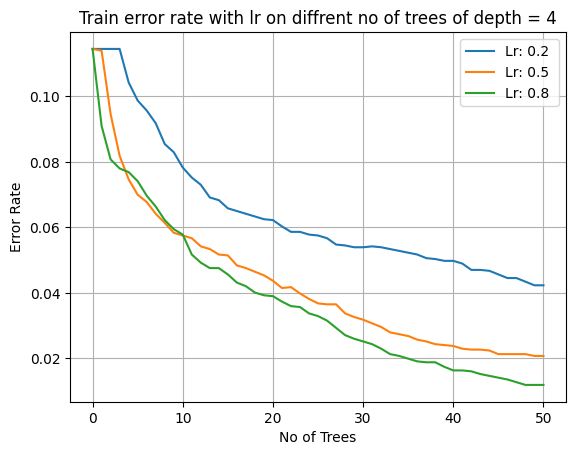

0.011891592920353982


In [ ]:
for i in range(len(losses_train)):
    plt.plot(losses_train[i], label = f'Lr: {lrs[i]} ')
    print(f"Min Train Error: {min(losses_train[i])} at lr: {lrs[i]}")
plt.title('Train error rate with lr on diffrent no of trees of depth = 4')
plt.grid()
plt.xticks()
plt.legend()
plt.xlabel('No of Trees')
plt.ylabel('Error Rate')
plt.show()

print(min(min(losses_train)))

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.